In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
2672,2150-OEGBV,Male,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.10,562.6,No
4928,2718-GAXQD,Female,1,Yes,Yes,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,46.00,181.6,Yes
1235,1543-LLLFT,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,One year,Yes,Mailed check,98.30,6066.55,No
1589,7351-KYHQH,Female,1,No,No,7,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,64.95,493.65,No


In [3]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

**Data Exploration**

In [4]:
#there is no need of CustomerId  so drop it

df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.shape

(7043, 20)

In [6]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


there is some space in TotalCharges column..basicaily it's null
need to drop those samples

In [8]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [10]:
#let's drop this null values

df1=df[df.TotalCharges!=' ']

df1.shape

(7032, 20)

In [11]:
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:

df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#tenure 

df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

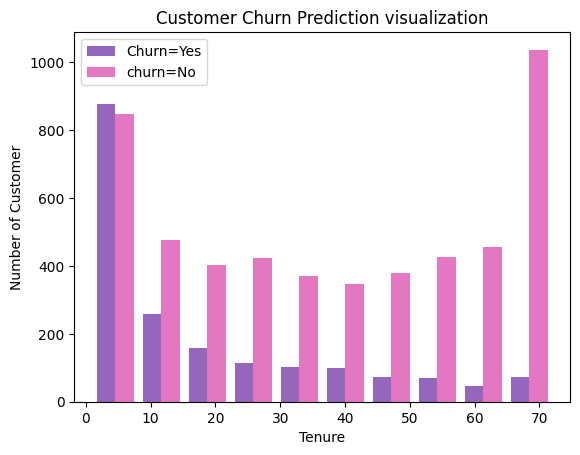

In [14]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure


plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['C4','C6'],
         label=['Churn=Yes','churn=No'])
 
plt.legend()

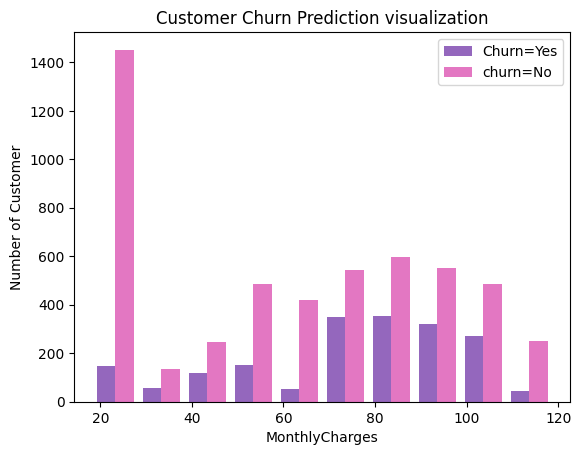

In [15]:
#sometime if monthly charge is high the customer Churn maybe be high

mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges


plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([mc_churn_yes,mc_churn_no],color=['C4','C6'],
         label=['Churn=Yes','churn=No'])
 
plt.legend()

Lable Encoding

In [16]:
def print_unique_col_values(df1):
    for column in df1:
        if df1[column].dtypes=='object':
            print(f'{column}:{df1[column].unique()}')

In [17]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [18]:
#No internet service just mean No ,so we can replace it with just No
#also No phone service
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/tmp/ipykernel_21/3548723037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/tmp/ipykernel_21/3548723037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [19]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [20]:
#We all Know machine learning models do not understand text so we have to convert
#every text or string type of columns to number

#let's covert each yes and no with one and no

yes_no_columns =['Partner','Dependents','PhoneService',
                 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

/tmp/ipykernel_21/4005596517.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [21]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipykernel_21/698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [22]:
#create dummy columns after oneHotencodein

df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=float)

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
914,0,0,1,1,72,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1269,0,0,1,1,62,1,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5222,1,0,0,0,8,1,1,1,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3677,1,0,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


scaling data..Firstly figure out which columns we need to scale

In [24]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [25]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
53,1,1,1,0,0.098592,1,1,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4557,0,0,0,0,0.732394,0,0,0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5778,1,0,0,0,0.000000,1,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4889,0,0,1,1,0.647887,1,1,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [26]:
 for column in df2:
    print(f'{column}:{df2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

Great our dataset is ready to use.

figure out our target and feature columns

In [27]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

Now split data sets

In [28]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   test_size=0.2,random_state=42)



In [29]:
X_train.shape

(5625, 26)

In [30]:
X_test.shape

(1407, 26)

In [31]:
len(X_train.columns)

26

create ANN model

One hidden layer  and one Output layer



In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.7380
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8018
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accura

Evaluate model on test set

In [33]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7882


[0.4459972381591797, 0.7882018685340881]

In [34]:
yp=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [35]:
# yp contain values between 0,1

yp[:5]

array([[0.00341695],
       [0.07671134],
       [0.7320323 ],
       [0.04806666],
       [0.34143582]], dtype=float32)

In [36]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

let's convert yp to zero ,one

In [37]:
y_pred=[]

for element in yp:
    if element> 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

1. accuracy= total currect prediction / total prediction

2. Precision for 0 class i.e precision for customers who did not churn

      precision= total correct pred zero/ total pred zero
      
3. recall for 0

   recall= correct predicted zero /total number of zero



In [38]:
# #accuracy
# acc=round((921+186)/(921+112+188+186),2)

# #precision for 0
# p0=round(915/(915+177),2)

# #precision for 1
# p1=round(197/(118+197),2)

# #recall for 0:
# recall=round(915/(915+118),2)

# acc,p0,p1,recall

In [39]:
from sklearn.metrics import confusion_matrix,classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

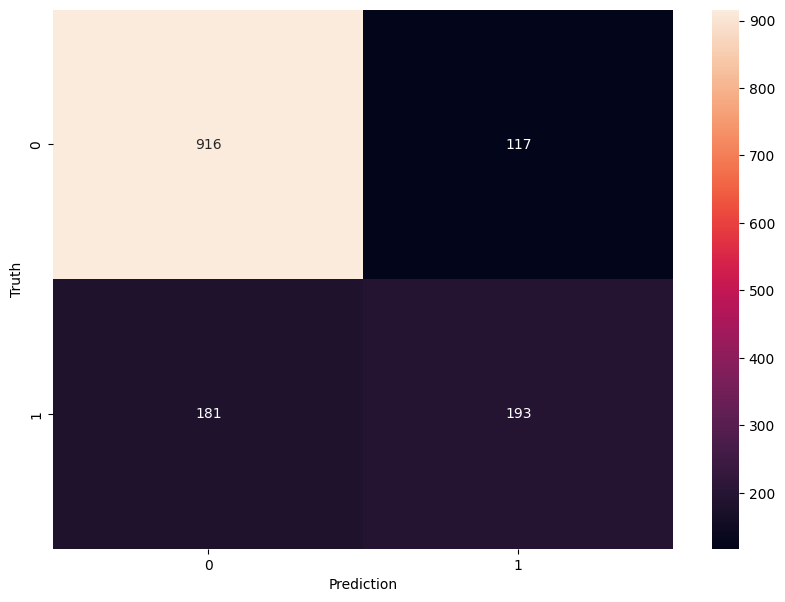

In [40]:
import seaborn as sn

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Mitigating Skewdness of Data

using SMOTE thats improve f1 score for both class

Synthetic Minority Over-Sampling Technique

In [41]:
!pip install -U imbalanced-learn

In [42]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


from imblearn.over_sampling import SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [45]:
# Number of classes in training Data
y_train.value_counts()


Churn
1    4130
0    4130
Name: count, dtype: int64

In [46]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5593 - accuracy: 0.7317
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7714
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7741
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7771
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7803
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7808
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4571 - accuracy: 0.7820
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4549 - accuracy: 0.7828
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7851
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4510 - accura

In [47]:
print(model.evaluate(X_test, y_test))
    
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))
    

65/65 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8006
[0.4341287314891815, 0.8005808591842651]
65/65 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.79      0.82      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

